# Python Libraries

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import numpy as np

# Read the Dataset

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d pranavraikokte/covid19-image-dataset

Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
 99% 157M/158M [00:07<00:00, 23.7MB/s]
100% 158M/158M [00:07<00:00, 21.0MB/s]


In [2]:
! unzip /content/covid19-image-dataset.zip

Archive:  /content/covid19-image-dataset.zip
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00012.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00022.jpg  
  inflatin

In [3]:
train_path = "/content/Covid19-dataset/train"
test_path = "/content/Covid19-dataset/test"

In [7]:
image_classes = os.listdir("/content/Covid19-dataset/test")
image_classes

['Covid', 'Normal', 'Viral Pneumonia']

# Data Visualization

In [8]:
def plot_images(image_classes):
    plt.figure(figsize = (14, 14))

    for i, category in enumerate(image_classes):
        image_path = train_path + "/" + category
        image_in_folder = os.listdir(image_path)

        first_image = image_in_folder[0]
        first_image_path = image_path + "/" + first_image

        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255

        plt.subplot(4,4, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis("off")
    plt.show()

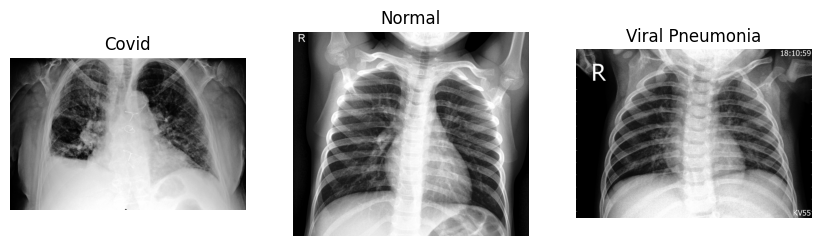

In [9]:
plot_images(image_classes)

# Data Preprocessing

In [10]:
image_generator = ImageDataGenerator(rescale = 1/255)

In [11]:
train_data = image_generator.flow_from_directory(train_path,
                                                target_size = (512, 512),
                                                batch_size = 16,
                                                class_mode = "categorical")

Found 251 images belonging to 3 classes.


In [12]:
test_data = image_generator.flow_from_directory(test_path,
                                                target_size = (512, 512),
                                                batch_size = 1,
                                                class_mode = "categorical")

Found 66 images belonging to 3 classes.


# CNN Model Building

In [13]:
model = Sequential()

In [14]:
# Convolutional Layer
model.add(Conv2D(filters = 16,
                 kernel_size = 3,
                 padding = "same",
                 activation = "relu",
                 input_shape = [512, 512, 3])
         )

# Pooling Layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional Layer
model.add(Conv2D(filters = 64,
                 kernel_size = 3,
                 padding = "same",
                 activation = "relu",)
         )

# Pooling Layer
model.add(MaxPooling2D())

# Convolutional Layer
model.add(Conv2D(filters = 128,
                 kernel_size = 3,
                 padding = "same",
                 activation = "relu",)
         )

# Pooling Layer
model.add(MaxPooling2D())


# CLASSIFICATION

# Flatten Layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation = "relu"))
model.add(Dense(128, activation = "relu"))

# Output Layer
model.add(Dense(3, activation = "softmax"))

# Model Summary

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 256, 256, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 128, 128, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 128)       0

# Model Compiling & Fitting

In [16]:
model.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [17]:
model_history = model.fit(train_data,
                         epochs = 3,
                         validation_data = test_data )

Epoch 1/3
16/16 [==============================] - 18s 669ms/step - loss: 2.2608 - accuracy: 0.5697 - val_loss: 0.8769 - val_accuracy: 0.6061
Epoch 2/3
16/16 [==============================] - 9s 524ms/step - loss: 0.2772 - accuracy: 0.8805 - val_loss: 0.1703 - val_accuracy: 0.9091
Epoch 3/3
16/16 [==============================] - 9s 587ms/step - loss: 0.0990 - accuracy: 0.9641 - val_loss: 0.1195 - val_accuracy: 0.9394


# Model Visualization

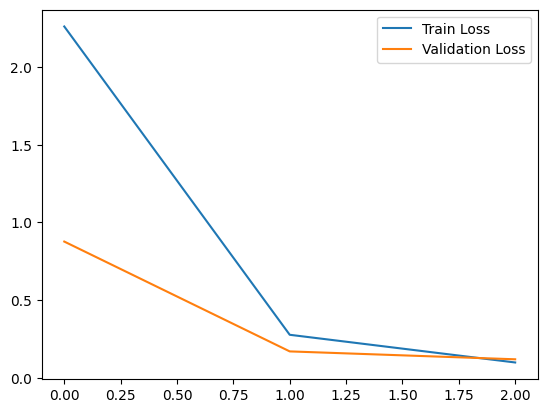

In [18]:
plt.plot(model_history.history["loss"], label = "Train Loss")
plt.plot(model_history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

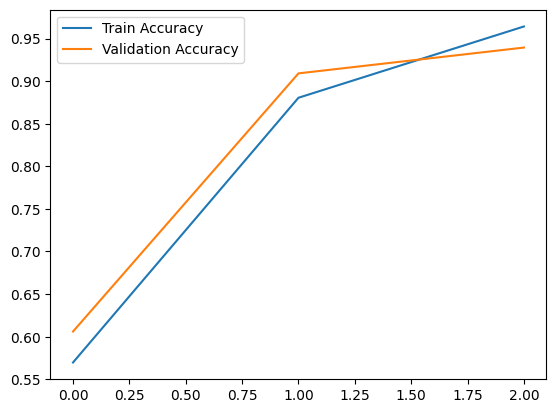

In [19]:
plt.plot(model_history.history["accuracy"], label = "Train Accuracy")
plt.plot(model_history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

# Model Evaluation

In [20]:
model.evaluate(test_data)

66/66 [==============================] - 1s 16ms/step - loss: 0.1195 - accuracy: 0.9394


[0.11950697749853134, 0.939393937587738]

In [21]:
model.evaluate(train_data)

16/16 [==============================] - 6s 386ms/step - loss: 0.0387 - accuracy: 0.9960


[0.03873365372419357, 0.9960159659385681]

# TFLite Convert

In [22]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Dönüştürülen modeli .tflite dosyasına yazma
with open('covidmodel.tflite', 'wb') as f:
    f.write(tflite_model)

In [23]:
labels = image_classes
deger=0;
# Etiket listesini labels.txt dosyasına yazma
with open("labels.txt", "w") as f:
    for label in labels:
        f.write(str(deger)+" "+label + "\n")
        deger=deger+1